In [1]:
import tensorflow as tf
# È†êË®≠ÊÉÖÊ≥Å‰∏ãÔºåtensorflowÊúÉÁÇ∫‰∫ÜÈÅøÂÖçÁ¢éÁâáÂåñÁöÑË®òÊÜ∂È´îÈÄ†ÊàêÊïàËÉΩ‰∏ç‰Ω≥ÁöÑÊÉÖÊ≥ÅËÄå‰∏ÄÊ¨°ÊÄßÁöÑ‰ΩîÁî®È°ØÂç°ÊâÄÊúâË®òÊÜ∂È´îÔºå
# ÈÄôÈÉ®‰ªΩÂèØ‰ª•ÈÄèÈÅétf.config‰æÜÈôêÂà∂Á°¨È´îË≥áÊ∫ê‰ª•ÂèäÊåáÂÆöÈ°ØÂç°Ë®òÊÜ∂È´îÁöÑ‰ΩøÁî®„ÄÇ
def select_gpu(N):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    print(gpus)
    if gpus:
        try:
            for gpu in gpus:
                # If memory growth is enabled for a PhysicalDevice, 
                # the runtime initialization will not allocate all memory on the device. 
                # Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
                tf.config.experimental.set_memory_growth(gpu, True)
            # ÊåáÂÆö‰ΩøÁî®Âì™È°ÜGPU
            tf.config.experimental.set_visible_devices(gpus[N], 'GPU')
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            print(e)

In [2]:
select_gpu(0) 
epochs = 5
model_name = 'bilstm-nltk-token'
sequence_length = 48

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]
3 Physical GPUs, 1 Logical GPUs


In [3]:
import pandas as pd
import numpy as np
import json

In [4]:
data_path = '/home/Danny/Data-Mining/lab2/kaggle/data/'

In [5]:
json_list = list()
with open(data_path + 'tweets_DM.json' , 'r') as file:
    for line in file:
        json_list.append(json.loads(line))

In [6]:
tweet_list = list()
for json in json_list:
    tweet_id = json['_source']['tweet']['tweet_id']
    hashtags = json['_source']['tweet']['hashtags']
    hashtag = ' '.join(hashtags)
    text = json['_source']['tweet']['text']
#     text = text + ' ' + hashtag
    tweet_list.append([tweet_id, text])

In [7]:
emotion_df = pd.read_csv(data_path + 'emotion.csv')
emotion_df

tweet_id       emotion
0        0x3140b1       sadness
1        0x368b73       disgust
2        0x296183  anticipation
3        0x2bd6e1           joy
4        0x2ee1dd  anticipation
...           ...           ...
1455558  0x38dba0           joy
1455559  0x300ea2           joy
1455560  0x360b99          fear
1455561  0x22eecf           joy
1455562  0x2fb282  anticipation

[1455563 rows x 2 columns]

In [8]:
identification_df = pd.read_csv(data_path + 'data_identification.csv')
identification_df

tweet_id identification
0        0x28cc61           test
1        0x29e452          train
2        0x2b3819          train
3        0x2db41f           test
4        0x2a2acc          train
...           ...            ...
1867530  0x227e25          train
1867531  0x293813          train
1867532  0x1e1a7e          train
1867533  0x2156a5          train
1867534  0x2bb9d2          train

[1867535 rows x 2 columns]

In [9]:
emoji_dict = {
    "üòÇ": "lolface",
    "üòá": "smile",
    "üòÄ": "smile",
    "üéâ": "party",
    "üò≥": "embarrassed",
    "üòî": "sadface",
    "üëÄ": "shifty",
    "ü§∑": "shrugging",
    "üíî": "brokenhearted",
    "üëª": "ghost",
    "üòç": "heart",
    "üôÑ": "disdain",
    "üíñ": "heart",
    "‚úå": "victory",
    "üé∂": "music",
    "üò±": "shock",
    "üòÉ": "smile",
    "üòí": "unsatisfied",
    "üëä": "brofist",
    "üòÑ": "smile",
    "üåû": "smile",
    "üôå": "celebration",
    "üòÅ": "smile",
    "ü§ó": "hugging",
    "ü§£": "rofl",
    "üåà": "gaypride",
    "üòâ": "winking",
    "üíû": "heart",
    "üôÉ": "irony",
    "üòú": "winking",
    "üò≠": "bawling",
    "ü§î": "thinker",
    "üòé": "cool",
    "üíõ": "heart",
    "üíö": "heart",
    "üíÉ": "fun",
    "üíó": "heart",
    "üò¨": "awkward",
    "üòå": "relieved",
    "üòÖ": "whew",
    "üíã": "kiss",
    "üôà": "laugh",
    "üòä": "^^",
    "üëå": "okay",
    "üò°": "angry",
    "üòò": "kiss",
    "üò©": "weary",
    "üî•": "excellent",
    "üíô": "heart",
    "üíï": "heart",
    "üëè": "clapping",
    "üëç": "thumbsup",
    "üíØ": "perfect",
    "üíú": "heart",
    "üïò" : "late",
    "üò°" : "angry",
    "üòí" : "dissatisfied",
    "üò§" : "angry",
    "üò†" : "angry",
    "üòë" : "annoy",
    "üò∞": "anxious",
    "üòØ": "surprise",
    "üò®": "scared",
    "üò≤": "astonished",
    "üí™": "strong",
    "ü§¶": "facepalm",
    "‚ú®": "sparkle",
    "üò¢": "crying",
    "üíì": "heart",
    "üëë": "crown",
    "ü§ò": "rockon",
    "üåπ": "rose",
    "üòã": "delicious",
    "üòè": "flirting",
    "üòÜ": "XD",
    "üò´": "exhausted",
    "üò¶": "frowning",
    "üôè": "please",
}

In [10]:
frequent_name_dict = {
    "#realdonaldtrump": "sadness",
    "#fifthharmony": "sadness",
    "#mostrequestlive": "sadness",
    "#onairromeo": "sadness",
    "#matthardybrand": "sadness",
}

In [11]:
text_df = pd.DataFrame(tweet_list, columns=['tweet_id', 'text'])
text_df

tweet_id                                               text
0        0x376b20  People who post "add me on #Snapchat" must be ...
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...
2        0x28b412  Confident of your obedience, I write to you, k...
3        0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>
4        0x2de201  "Trust is not the same as faith. A friend is s...
...           ...                                                ...
1867530  0x316b80  When you buy the last 2 tickets remaining for ...
1867531  0x29d0cb  I swear all this hard work gone pay off one da...
1867532  0x2a6a4f  @Parcel2Go no card left when I wasn't in so I ...
1867533  0x24faed  Ah, corporate life, where you can date <LH> us...
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>

[1867535 rows x 2 columns]

In [12]:
import re
def replace_word(text):
    text_list = text.split()
    for i, j in enumerate(text_list):
        if j in emoji_dict:
            text_list[i] = emoji_dict[j]
        if j in frequent_name_dict:
            text_list[i] = frequent_name_dict[j]
    text = ' '.join(text_list)
    text = re.sub('<lh>|<|>|@|#|', '', text)
    return text.split()

In [13]:
%%time
import nltk
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
text_df['token'] = text_df['text'].apply(lambda s : s.lower())
text_df['token'] = text_df['token'].apply(lambda s : tweet_tokenizer.tokenize(s))
text_df['token'] = text_df['token'].apply(lambda s : ' '.join(s))
text_df['token'] = text_df['token'].apply(lambda s : replace_word(s))
text_df

CPU times: user 3min 33s, sys: 36.7 s, total: 4min 10s
Wall time: 4min 11s


tweet_id                                               text  \
0        0x376b20  People who post "add me on #Snapchat" must be ...   
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2        0x28b412  Confident of your obedience, I write to you, k...   
3        0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>   
4        0x2de201  "Trust is not the same as faith. A friend is s...   
...           ...                                                ...   
1867530  0x316b80  When you buy the last 2 tickets remaining for ...   
1867531  0x29d0cb  I swear all this hard work gone pay off one da...   
1867532  0x2a6a4f  @Parcel2Go no card left when I wasn't in so I ...   
1867533  0x24faed  Ah, corporate life, where you can date <LH> us...   
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>   

                                                     token  
0        [people, who, post, ", add, me, on, snapchat, ...  
1        [as, we, see, ,, trump, is, dangerous, to, fre...  
2        [confident, of, your, obedience, ,, i, write, ...  
3        [now, issa, is, stalking, tasha, lolface, lolf...  
4        [", trust, is, not, the, same, as, faith, ., a...  
...                                                    ...  
1867530  [when, you, buy, the, last, 2, tickets, remain...  
1867531  [i, swear, all, this, hard, work, gone, pay, o...  
1867532  [no, card, left, when, i, wasn't, in, so, i, h...  
1867533  [ah, ,, corporate, life, ,, where, you, can, d...  
1867534             [blessed, to, be, living, sundayvibes]  

[1867535 rows x 3 columns]

In [14]:
# %%time
# from kashgari.tokenizers import BertTokenizer
# vocab_path = '/home/Danny/pretrain_model/{}/vocab.txt'.format(model_name)
# tokenizer = BertTokenizer.load_from_vocab_file(vocab_path)
# text_df['token'] = text_df['text'].apply(lambda s : tokenizer.tokenize(s))
# text_df

In [15]:
# text_df['token'] = text_df['text'].apply(lambda s : s.split())
# text_df

In [16]:
test_df = identification_df[identification_df['identification'] == 'test']
# test_df

In [17]:
train_df = text_df.merge(emotion_df, left_on='tweet_id', right_on='tweet_id')
# train_df

In [18]:
x_list = train_df['token'].to_list()
y_list = train_df['emotion'].to_list()
print(len(x_list))
print(len(y_list))

1455563
1455563


In [19]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_list, y_list, test_size=0.2, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
print(len(train_x), len(train_y))
print(len(test_x), len(test_y))
print(len(valid_x), len(valid_y))

931560 931560
291113 291113
232890 232890


In [22]:
%%time
import kashgari
from kashgari.tasks.classification import BiLSTM_Model
kashgari.config.use_cudnn_cell = True
import logging
logging.basicConfig(level='DEBUG')
from kashgari.embeddings import BertEmbedding
# bert_embed = BertEmbedding('/home/Danny/pretrain_model/{}'.format(model_name))
model = BiLSTM_Model()
history = model.fit(train_x, 
                    train_y, 
                    valid_x, 
                    valid_y,
                    epochs=epochs,
                    batch_size=256,
                   )

Preparing text vocab dict: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 232890/232890 [00:01<00:00, 120429.63it/s]
2020-12-04 14:34:08,703 [DEBUG] kashgari - --- Build vocab dict finished, Total: 97676 ---
2020-12-04 14:34:08,707 [DEBUG] kashgari - Top-10: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '.', 'the', '!', 'to', ',', 'i']
Calculating sequence length: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 232890/232890 [00:00<00:00, 1174375.47it/s]
2020-12-04 14:34:11,170 [DEBUG] kashgari - Calculated sequence length = 28
2020-12-04 14:34:13,154 [DEBUG] kashgari - Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
layer_embedding (Embedding)  (None, None, 100)         9767600   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)

Epoch 1/5
3638/3638 [==============================] - 382s 105ms/step - loss: 1.2729 - accuracy: 0.5410 - val_loss: 1.1962 - val_accuracy: 0.5688
Epoch 2/5
3638/3638 [==============================] - 380s 105ms/step - loss: 1.0997 - accuracy: 0.6041 - val_loss: 1.1974 - val_accuracy: 0.5746
Epoch 3/5
3638/3638 [==============================] - 383s 105ms/step - loss: 0.9709 - accuracy: 0.6516 - val_loss: 1.3064 - val_accuracy: 0.5639
Epoch 4/5
3638/3638 [==============================] - 391s 108ms/step - loss: 0.8299 - accuracy: 0.7033 - val_loss: 1.5088 - val_accuracy: 0.5500
Epoch 5/5
3638/3638 [==============================] - 391s 108ms/step - loss: 0.7091 - accuracy: 0.7477 - val_loss: 1.7503 - val_accuracy: 0.5400
CPU times: user 3h 6min 37s, sys: 30min 15s, total: 3h 36min 53s
Wall time: 32min 31s


In [23]:
model.evaluate(test_x, test_y)
model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
model.save(model_path)

2020-12-04 15:06:29,480 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 101
2020-12-04 15:06:33,616 [DEBUG] kashgari - predict input shape (291113, 101) x: 
[[   2  108   11 ...    0    0    0]
 [   2  165   81 ...    0    0    0]
 [   2  752   58 ...    0    0    0]
 ...
 [   2    9 1429 ...    0    0    0]
 [   2   12  329 ...    0    0    0]
 [   2  891 4487 ...    0    0    0]]
2020-12-04 15:07:26,614 [DEBUG] kashgari - predict output shape (291113, 8)
2020-12-04 15:07:26,855 [DEBUG] kashgari - predict output argmax: [2 0 1 ... 3 0 5]


              precision    recall  f1-score   support

       anger     0.3757    0.3097    0.3395      7946
anticipation     0.6438    0.5267    0.5794     49984
     disgust     0.4460    0.3508    0.3927     27669
        fear     0.4788    0.4456    0.4616     12846
         joy     0.5891    0.7436    0.6574    102943
     sadness     0.4493    0.4991    0.4729     38745
    surprise     0.3719    0.2740    0.3156      9816
       trust     0.5087    0.3672    0.4266     41164

    accuracy                         0.5425    291113
   macro avg     0.4829    0.4396    0.4557    291113
weighted avg     0.5369    0.5425    0.5328    291113



2020-12-04 15:07:34,774 [INFO] kashgari - model saved to /home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bilstm-nltk-token_epoch_5


'/home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bilstm-nltk-token_epoch_5'

DEBUG:matplotlib:CONFIGDIR=/home/Danny/.config/matplotlib
DEBUG:matplotlib:(private) matplotlib data path: /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.2.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconf

DEBUG:matplotlib:CACHEDIR=/home/Danny/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/Danny/.cache/matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'aakar' (aakar-medium.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gubbi' (Gubbi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DE

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-L.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:fin

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'aakar' (aakar-medium.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Uroob' (Uroob.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_m

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sco

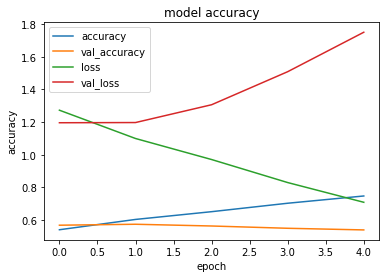

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [25]:
# model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
# model = kashgari.utils.load_model(model_path)
# model.evaluate(test_x, test_y)

In [26]:
test_df = test_df.merge(text_df, left_on='tweet_id', right_on='tweet_id')
test_df

tweet_id identification  \
0       0x28cc61           test   
1       0x2db41f           test   
2       0x2466f6           test   
3       0x23f9e9           test   
4       0x1fb4e1           test   
...          ...            ...   
411967  0x2c4dc2           test   
411968  0x31be7c           test   
411969  0x1ca58e           test   
411970  0x35c8ba           test   
411971  0x1d941b           test   

                                                     text  \
0       @Habbo I've seen two separate colours of the e...   
1       @FoxNews @KellyannePolls No serious self respe...   
2       Looking for a new car, and it says 1 lady owne...   
3       @cineworld ‚Äúonly the brave‚Äù just out and fount...   
4       Felt like total dog üí© going into open gym and ...   
...                                                   ...   
411967  6 year old walks in astounded. Mum! Look how b...   
411968  Only one week to go until the #inspiringvolunt...   
411969  I just got caught up with the manga for "My He...   
411970  Speak only when spoken to and make hot ass mus...   
411971  Know what you want and go for it. Fuck everyon...   

                                                    token  
0       [i've, seen, two, separate, colours, of, the, ...  
1       [no, serious, self, respecting, individual, be...  
2       [looking, for, a, new, car, ,, and, it, says, ...  
3       [‚Äú, only, the, brave, ‚Äù, just, out, and, fount...  
4       [felt, like, total, dog, üí©, going, into, open,...  
...                                                   ...  
411967  [6, year, old, walks, in, astounded, ., mum, !...  
411968  [only, one, week, to, go, until, the, inspirin...  
411969  [i, just, got, caught, up, with, the, manga, f...  
411970  [speak, only, when, spoken, to, and, make, hot...  
411971  [know, what, you, want, and, go, for, it, ., f...  

[411972 rows x 4 columns]

In [27]:
text_list = test_df['token'].tolist()
# text_list

In [28]:
predict_list = model.predict(text_list)
# predict_list

2020-12-04 15:07:52,537 [DEBUG] kashgari - predict input shape (411972, 96) x: 
[[   2  235  455 ...    0    0    0]
 [   2   61 1406 ...    0    0    0]
 [   2  281   13 ...    0    0    0]
 ...
 [   2    9   37 ...    0    0    0]
 [   2  735   80 ...    0    0    0]
 [   2   88   44 ...    0    0    0]]
2020-12-04 15:09:09,042 [DEBUG] kashgari - predict output shape (411972, 8)
2020-12-04 15:09:09,372 [DEBUG] kashgari - predict output argmax: [1 4 0 ... 3 0 0]


In [29]:
test_df['predict'] = predict_list
# test_df

In [30]:
output_df = test_df[['tweet_id', 'predict']]
output_df = output_df.rename(columns={'tweet_id':'id', 'predict':'emotion'})
# output_df

In [31]:
output_path = 'output/{}_epoch_{}.csv'.format(model_name, epochs)
output_df.to_csv(output_path, index=False, header=True)